In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* **GENDER :** M [Male] , F [Female]
* **AGE :** Age of patients
* **SMOKING :** 2 [Yes] , 1 [No]
* **YELLOW_FINGERS :** 2 [Yes] , 1 [No]  
* **ANXIETY :** 2 [Yes] , 1 [No]
* **PEER_PRESSURE :** 2 [Yes] , 1 [No]
* **CHRONIC DISEASE :** 2 [Yes] , 1 [No]
* **FATIGUE :** 2 [Yes] , 1 [No]
* **ALLERGY :** 2 [Yes] , 1 [No]
* **WHEEZING :** 2 [Yes] , 1 [No]
* **ALCOHOL CONSUMING :** 2 [Yes] , 1 [No]
* **COUGHING :** 2 [Yes] , 1 [No]
* **SHORTNESS OF BREATH :** 2 [Yes] , 1 [No]
* **SWALLOWING DIFFICULTY :** 2 [Yes] , 1 [No]
* **CHEST PAIN :** 2 [Yes] , 1 [No]
* **LUNG_CANCER :** YES [Positive] , NO [Negative]

In [3]:
data = pd.read_csv("cancer.csv")

In [4]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (309, 16)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
print(f"Informations About The Dataset :\n")
print(data.info())

Informations About The Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    i

<a id="4"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [6]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


,count,mean,std,min,25%,50%,75%,max
AGE,309.000000,62.673139,8.210301,21.000000,57.000000,62.000000,69.000000,87.000000
SMOKING,309.000000,1.563107,0.496806,1.000000,1.000000,2.000000,2.000000,2.000000
YELLOW_FINGERS,309.000000,1.569579,0.495938,1.000000,1.000000,2.000000,2.000000,2.000000
ANXIETY,309.000000,1.498382,0.500808,1.000000,1.000000,1.000000,2.000000,2.000000
PEER_PRESSURE,309.000000,1.501618,0.500808,1.000000,1.000000,2.000000,2.000000,2.000000
CHRONIC DISEASE,309.000000,1.504854,0.500787,1.000000,1.000000,2.000000,2.000000,2.000000
FATIGUE,309.000000,1.673139,0.469827,1.000000,1.000000,2.000000,2.000000,2.000000
ALLERGY,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
WHEEZING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
ALCOHOL CONSUMING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000


In [7]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


In [8]:
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


In [10]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


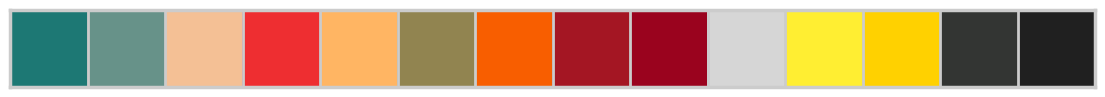

In [13]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

sns.palplot(sns.color_palette(palette))
plt.show()

Let's create a new dataframe containing only positive cases data.

In [12]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


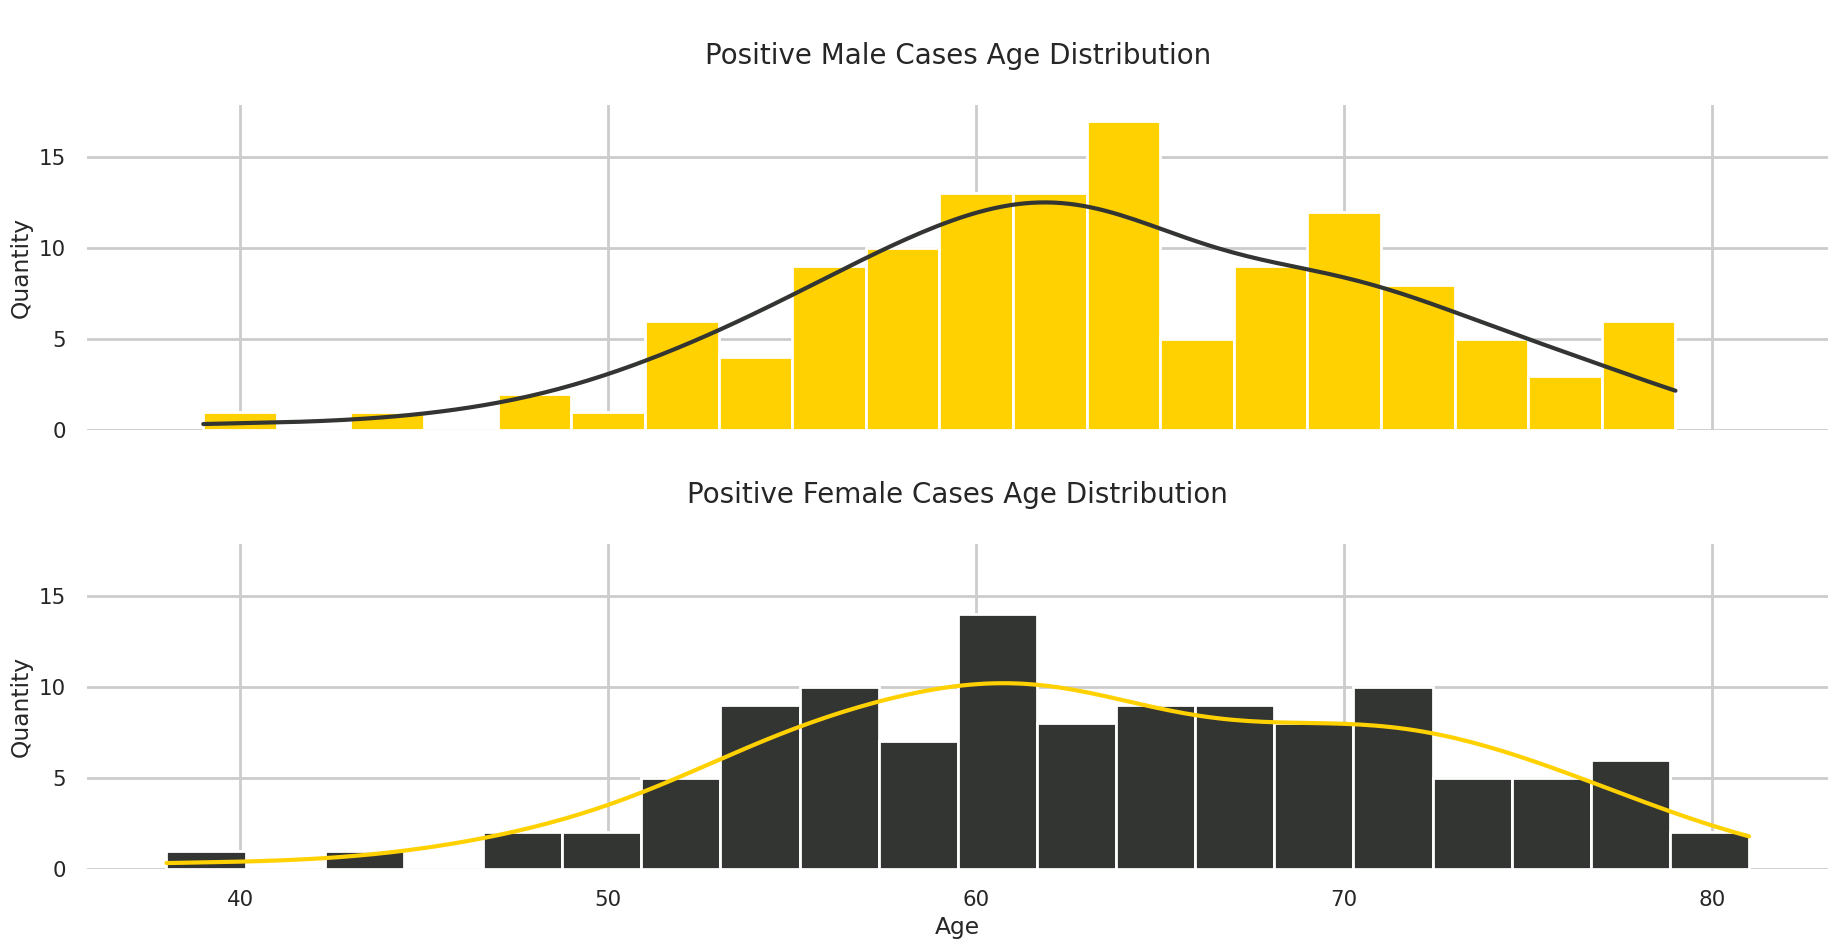

In [14]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

**Let's stack them together in a same figure.**

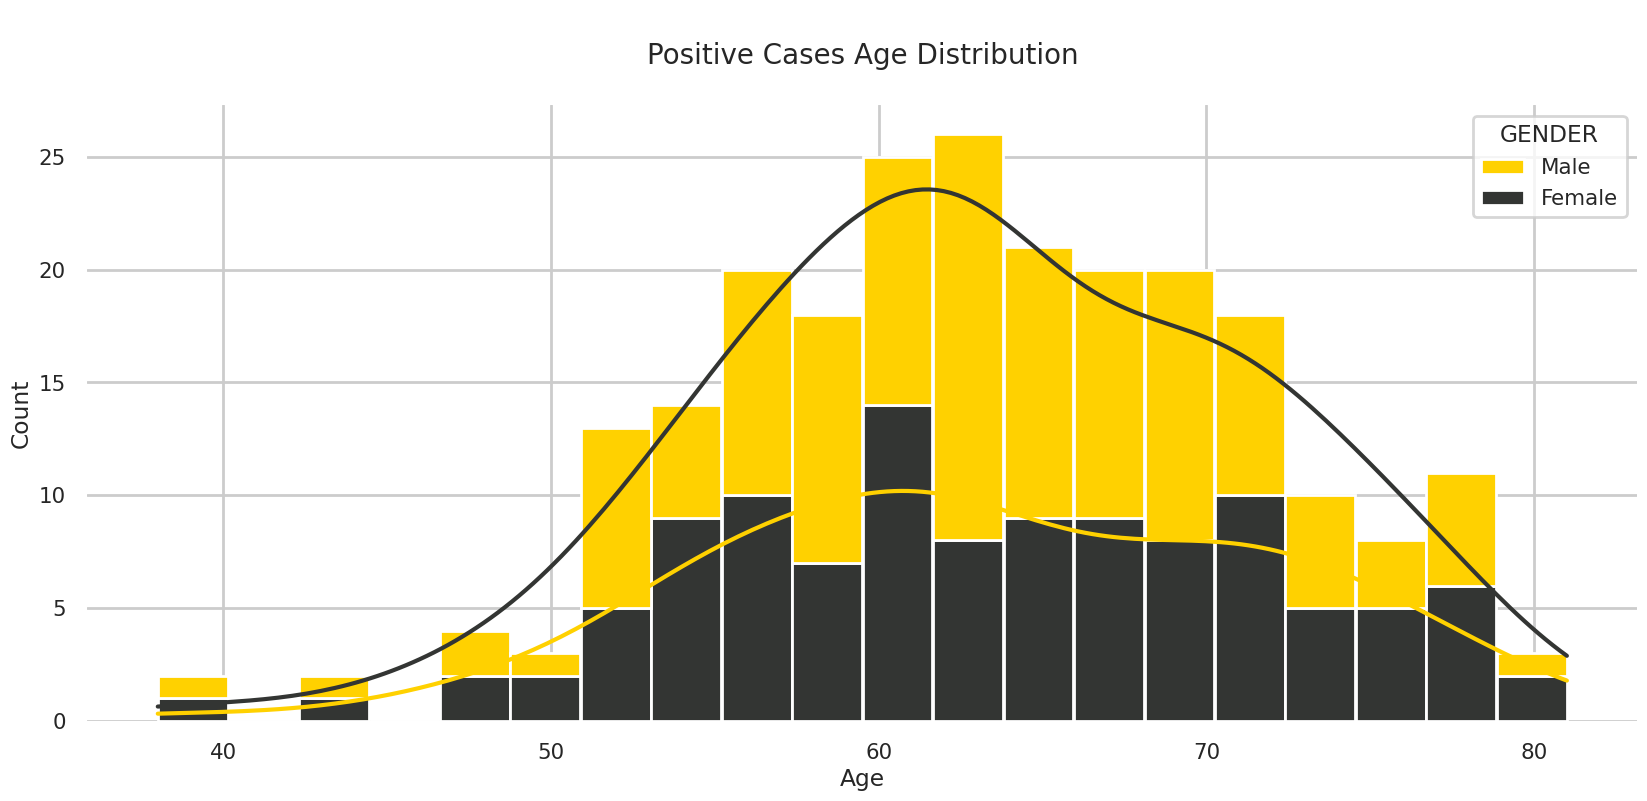

In [15]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp_pos,x="AGE",hue="GENDER",multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

<a id="9"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Positive Cases' Gender Distribution</p>

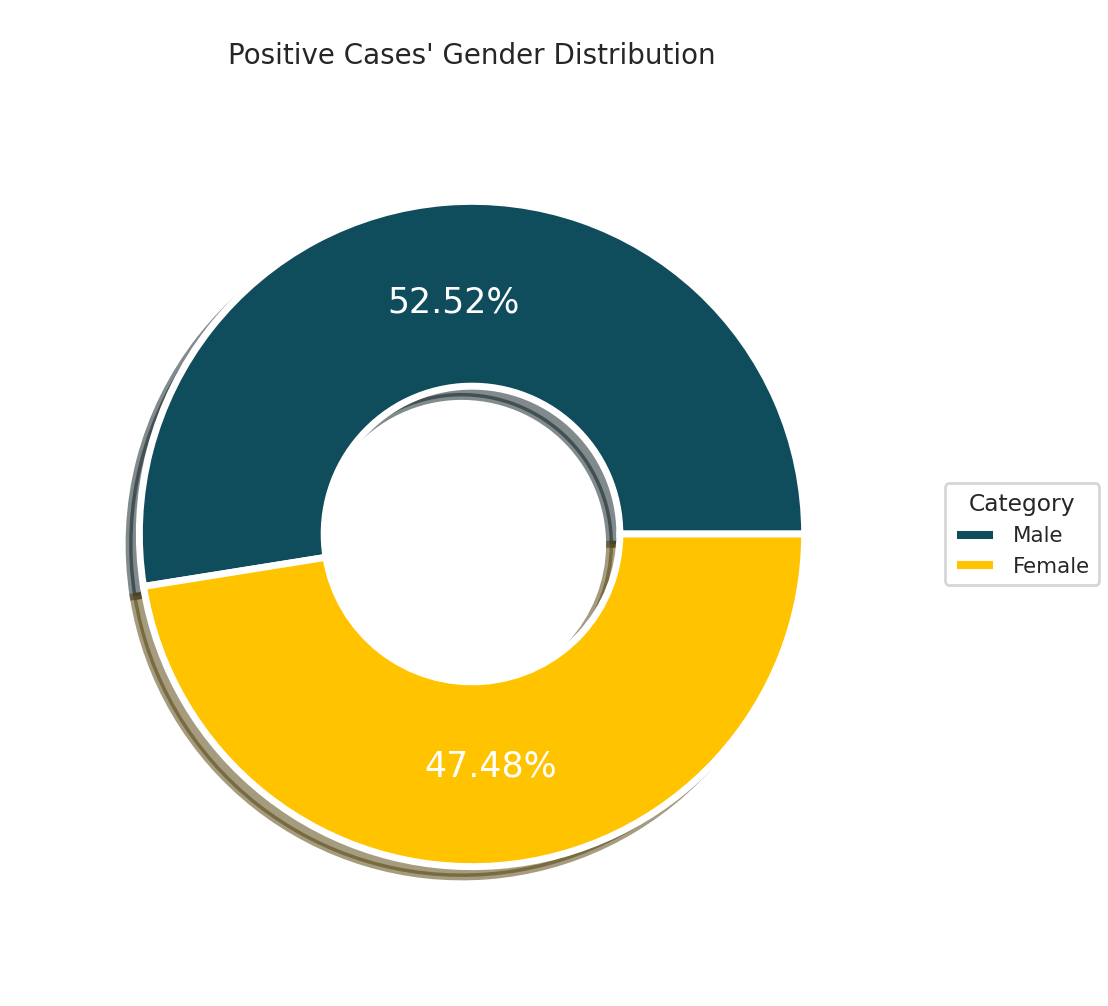

In [16]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = ["#0f4c5c","#FFC300"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

<a id="10"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gender-wise Positive Cases' Reasons</p>

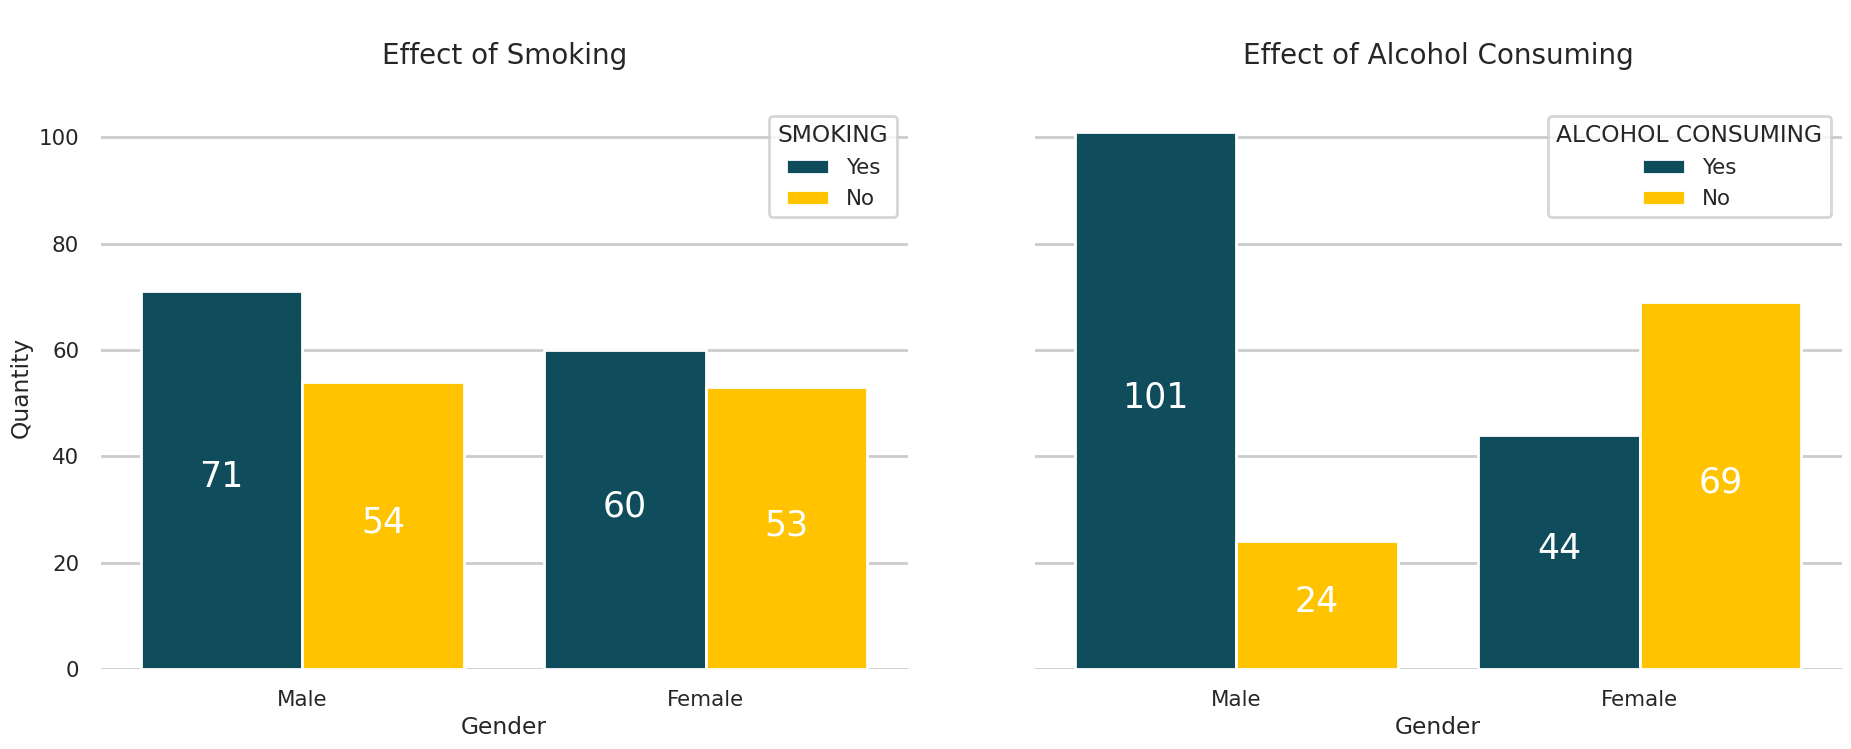

In [17]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

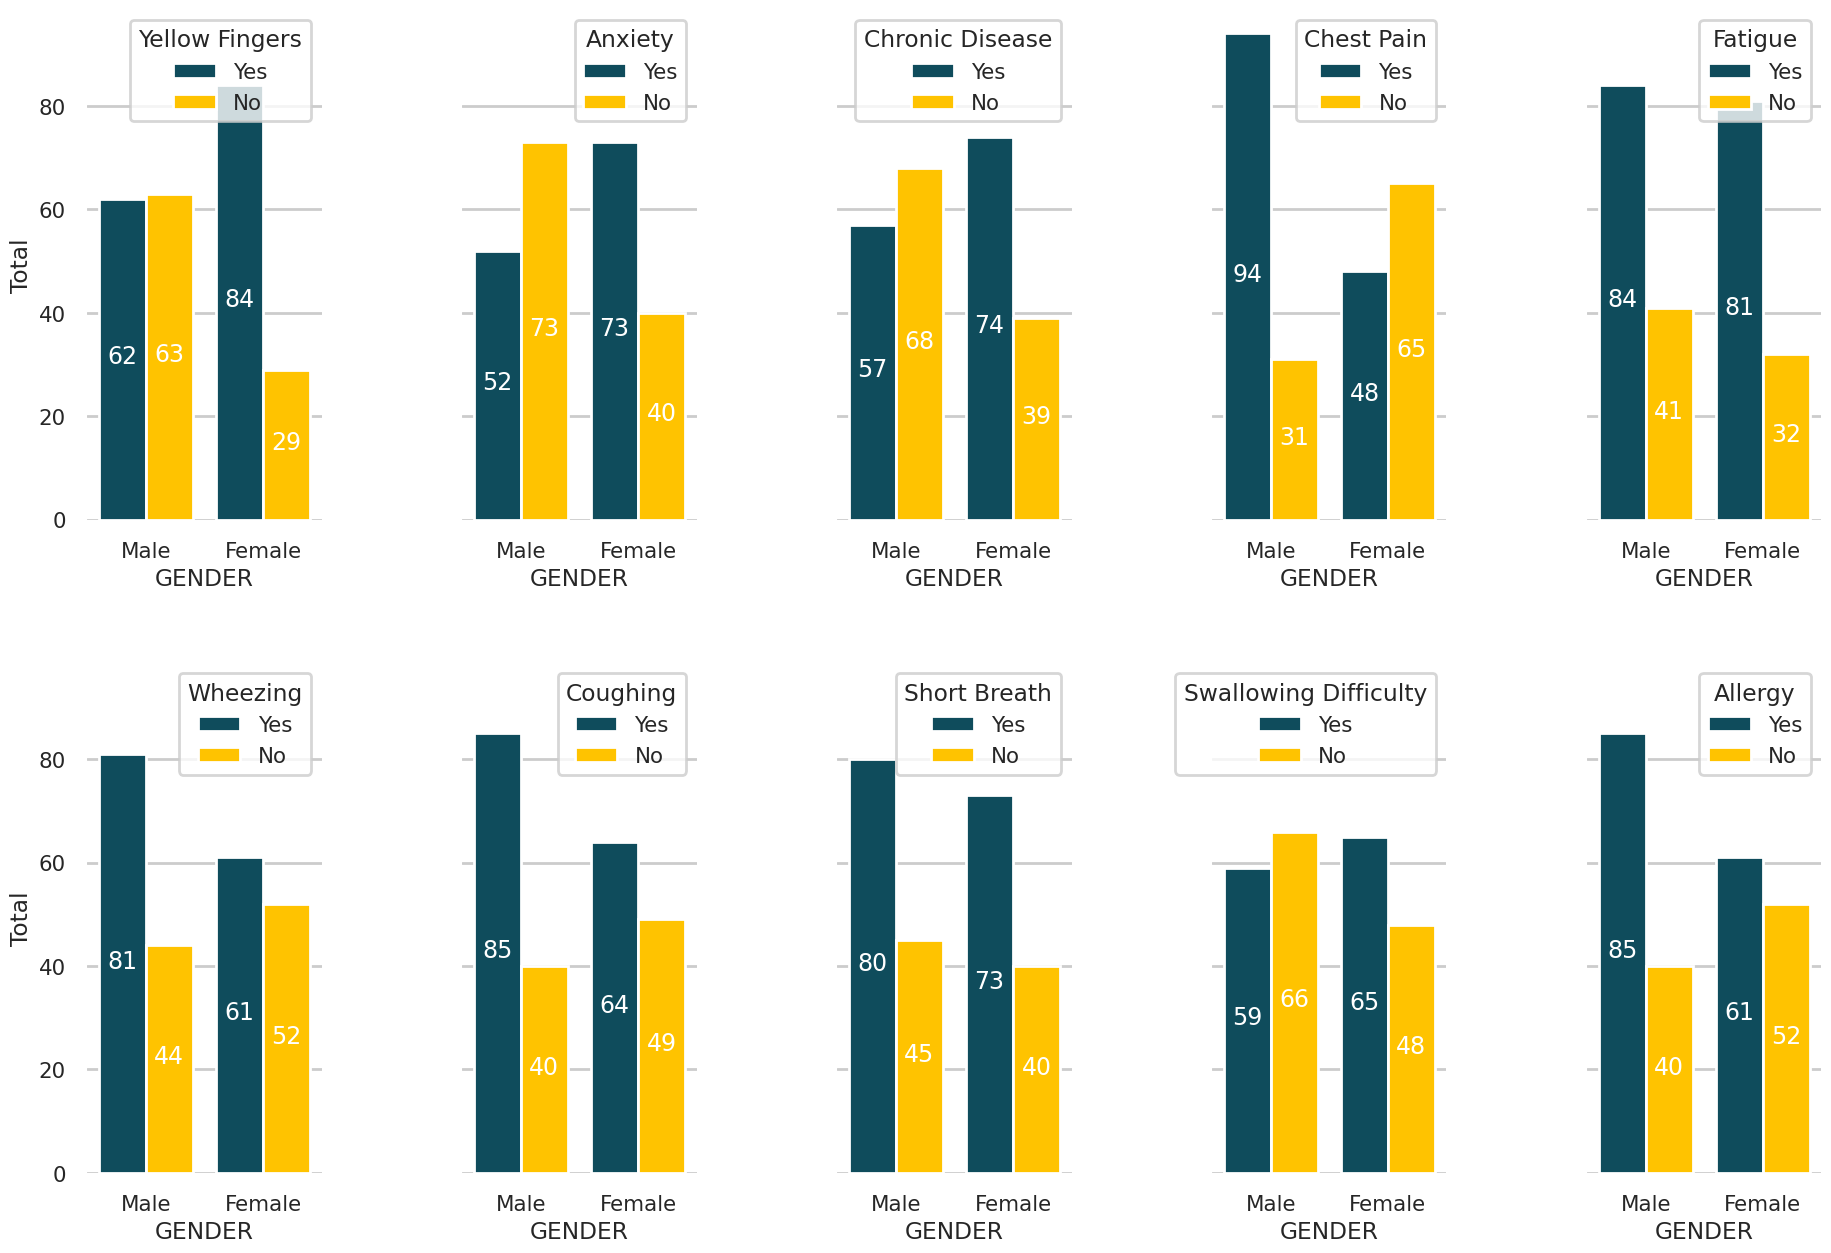

In [18]:
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=["Yes","No"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=["Yes","No"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=["Yes","No"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=["Yes","No"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=["Yes","No"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

<a id="12"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Correlation Heatmap</p>

In [19]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,True,False,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,True,False,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,False,True,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,True,False,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,False,True,1,1,2,2,1,1,1,2,1,1,1,2,0


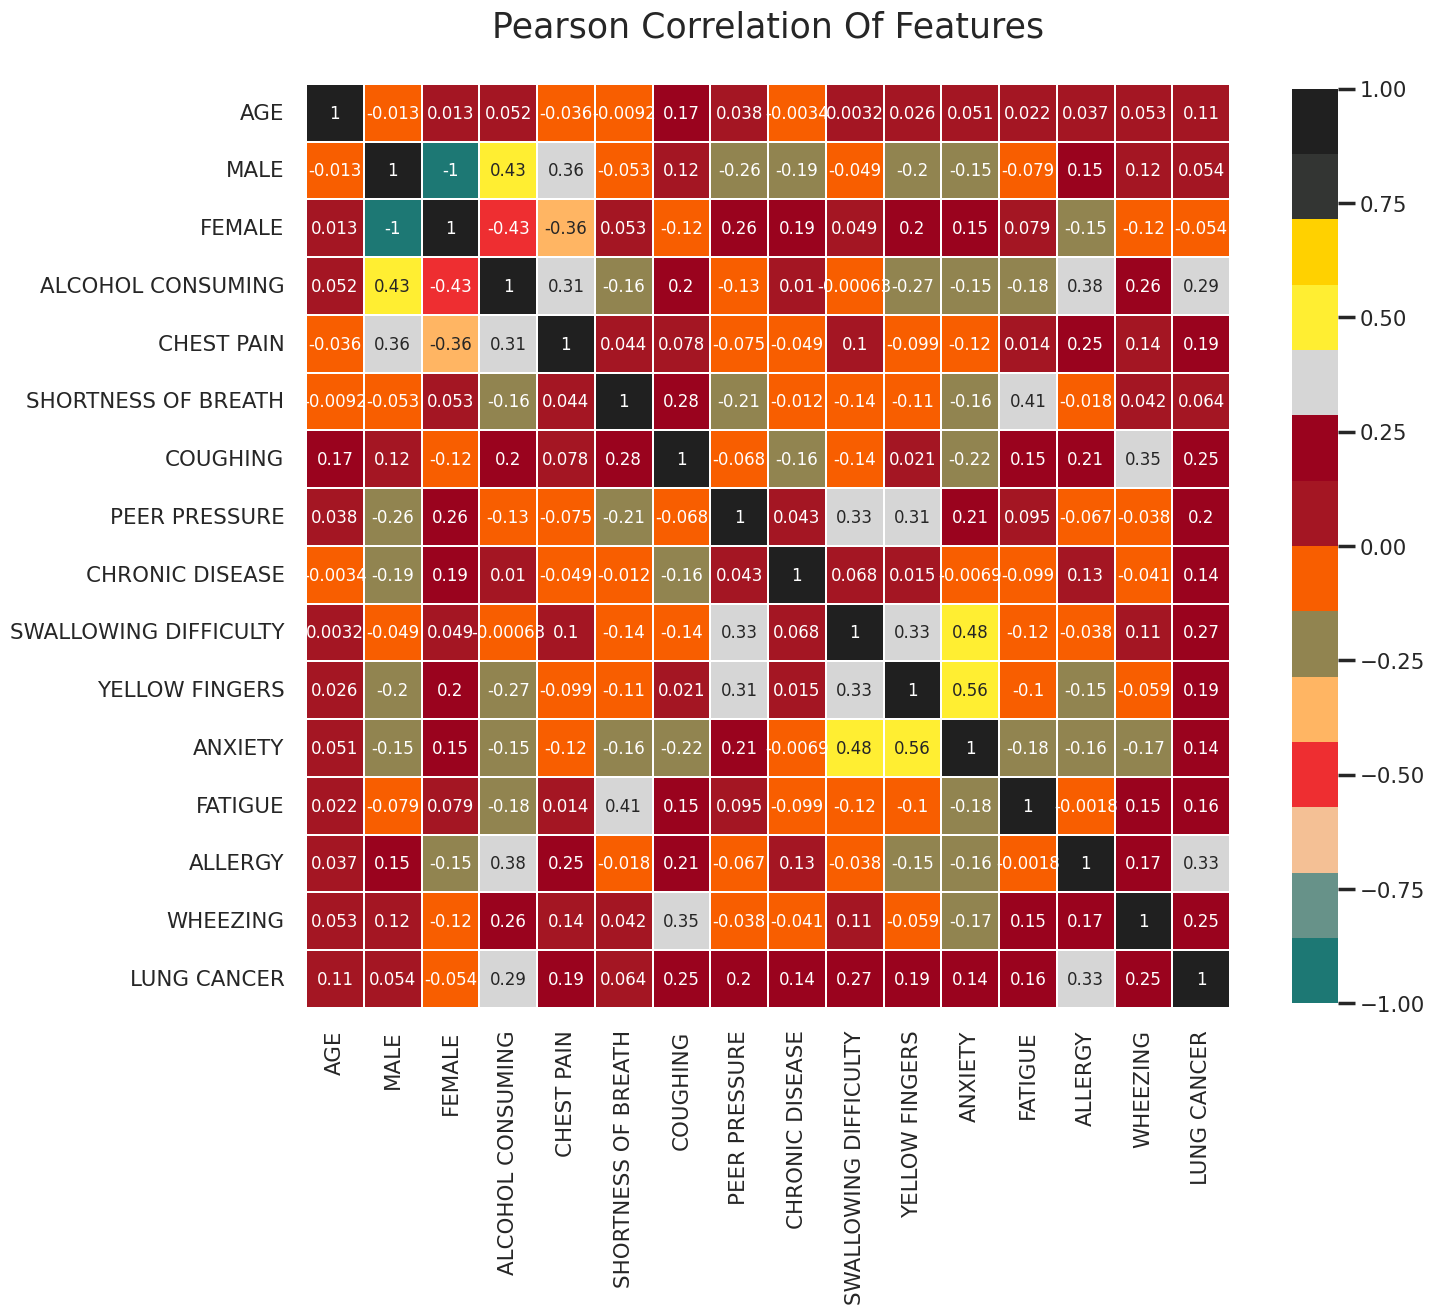

In [20]:
plt.subplots(figsize =(16, 12))

p=sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

<a id="13"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing For Classification</p>

In [21]:
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


<a id="14"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Logistic Regression Model</p>

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 5  7]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56


The Accuracy of Logistic Regression is 87.5 %


<a id="15"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Gaussian Naive Bayes Model</p>

In [23]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Gaussian Naive Bayes is 91.07 %


<a id="17"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Support Vector Machine Model</p>

In [25]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Support Vector Machine is 85.71 %


<a id="18"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest Model</p>

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Random Forest Classifier is 85.71 %


In [34]:
x_train

array([[-0.34784366, -1.02941804,  1.02941804, ...,  0.71287918,
         0.90984316, -1.09909053],
       [-2.9781135 , -1.02941804,  1.02941804, ...,  0.71287918,
         0.90984316,  0.90984316],
       [ 0.48906038, -1.02941804,  1.02941804, ..., -1.40276225,
        -1.09909053, -1.09909053],
       ...,
       [-1.66297858, -1.02941804,  1.02941804, ..., -1.40276225,
         0.90984316, -1.09909053],
       [ 1.68463758, -1.02941804,  1.02941804, ...,  0.71287918,
        -1.09909053, -1.09909053],
       [ 1.08684898, -1.02941804,  1.02941804, ...,  0.71287918,
        -1.09909053, -1.09909053]])

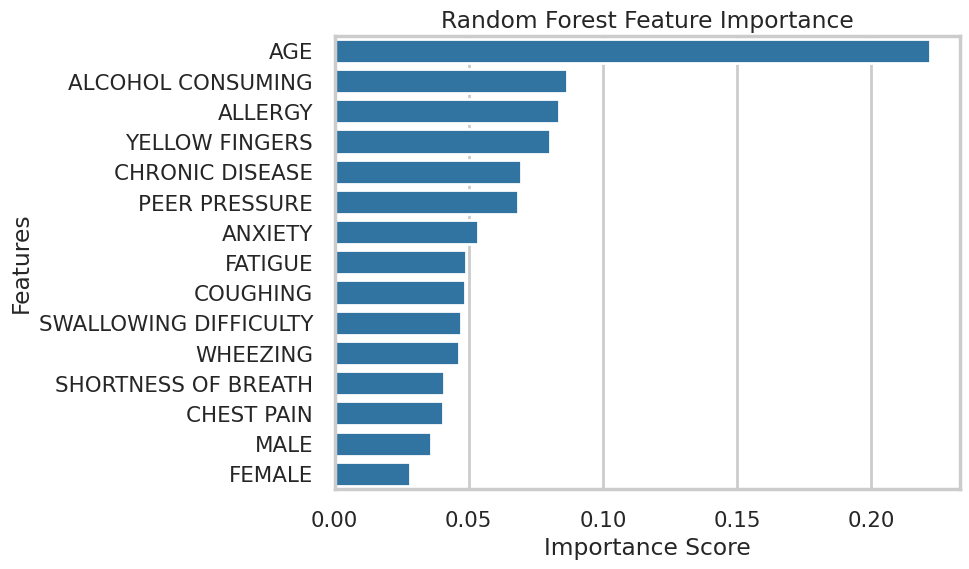

In [41]:
# Feature Importance calculation and visualization
feature_importance = pd.DataFrame({
    'feature': data.columns[0:-1],
    'importance': rfg.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


<a id="19"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">K Nearest Neighbors Model</p>

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[ 9  3]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56


The Accuracy of K Nearest Neighbors Classifier is 92.86 %


<a id="20"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Extreme Gradient Boosting Model</p>

In [28]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder = False)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_conf = confusion_matrix(y_test, xgb_pred)
xgb_report = classification_report(y_test, xgb_pred)
xgb_acc = round(accuracy_score(y_test, xgb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{xgb_conf}")
print(f"\nClassification Report : \n\n{xgb_report}")
print(f"\nThe Accuracy of Extreme Gradient Boosting Classifier is {xgb_acc} %")

Confusion Matrix : 

[[ 6  6]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.88      1.00      0.94        44

    accuracy                           0.89        56
   macro avg       0.94      0.75      0.80        56
weighted avg       0.91      0.89      0.88        56


The Accuracy of Extreme Gradient Boosting Classifier is 89.29 %


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:12:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<a id="21"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Neural Network Architecture</p>

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

        # Apply L1 regularization
        self.regularization_parameter = 0.003

    def forward(self, x):
        return self.model(x)

    def get_l1_loss(self):
        l1_loss = 0
        for param in self.parameters():
            l1_loss += torch.sum(torch.abs(param))
        return self.regularization_parameter * l1_loss

In [43]:
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=150):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1).float()) + model.get_l1_loss()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted.squeeze() == labels).sum().item()

            if correct/total == 1.0:
                print("\nAccuracy is 100% so canceling training!")
                break

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total

        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                total += labels.size(0)
                correct += (predicted.squeeze() == labels).sum().item()

        val_loss = val_loss / len(test_loader)
        val_acc = correct / total

        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f'Epoch {epoch+1}/{epochs}: train_loss={train_loss:.4f}, train_acc={train_acc:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}')

    return train_accs, val_accs, train_losses, val_losses

In [48]:
y_train

,LUNG CANCER
265,1
238,1
33,1
160,1
151,1
...,...
191,1
71,1
108,1
278,1


Epoch 1/150: train_loss=3.1910, train_acc=0.8818, val_loss=0.6582, val_acc=0.7857
Epoch 2/150: train_loss=3.0314, train_acc=0.8818, val_loss=0.6483, val_acc=0.7857
Epoch 3/150: train_loss=2.8791, train_acc=0.8818, val_loss=0.6392, val_acc=0.7857
Epoch 4/150: train_loss=2.7328, train_acc=0.8818, val_loss=0.6307, val_acc=0.7857
Epoch 5/150: train_loss=2.5917, train_acc=0.8818, val_loss=0.6220, val_acc=0.7857
Epoch 6/150: train_loss=2.4549, train_acc=0.8818, val_loss=0.6130, val_acc=0.7857
Epoch 7/150: train_loss=2.3210, train_acc=0.8818, val_loss=0.6033, val_acc=0.7857
Epoch 8/150: train_loss=2.2033, train_acc=0.8818, val_loss=0.5929, val_acc=0.7857
Epoch 9/150: train_loss=2.0679, train_acc=0.8818, val_loss=0.5824, val_acc=0.7857
Epoch 10/150: train_loss=1.9497, train_acc=0.8818, val_loss=0.5708, val_acc=0.7857
Epoch 11/150: train_loss=1.8437, train_acc=0.8818, val_loss=0.5584, val_acc=0.7857
Epoch 12/150: train_loss=1.7176, train_acc=0.8818, val_loss=0.5458, val_acc=0.7857
Epoch 13/150:

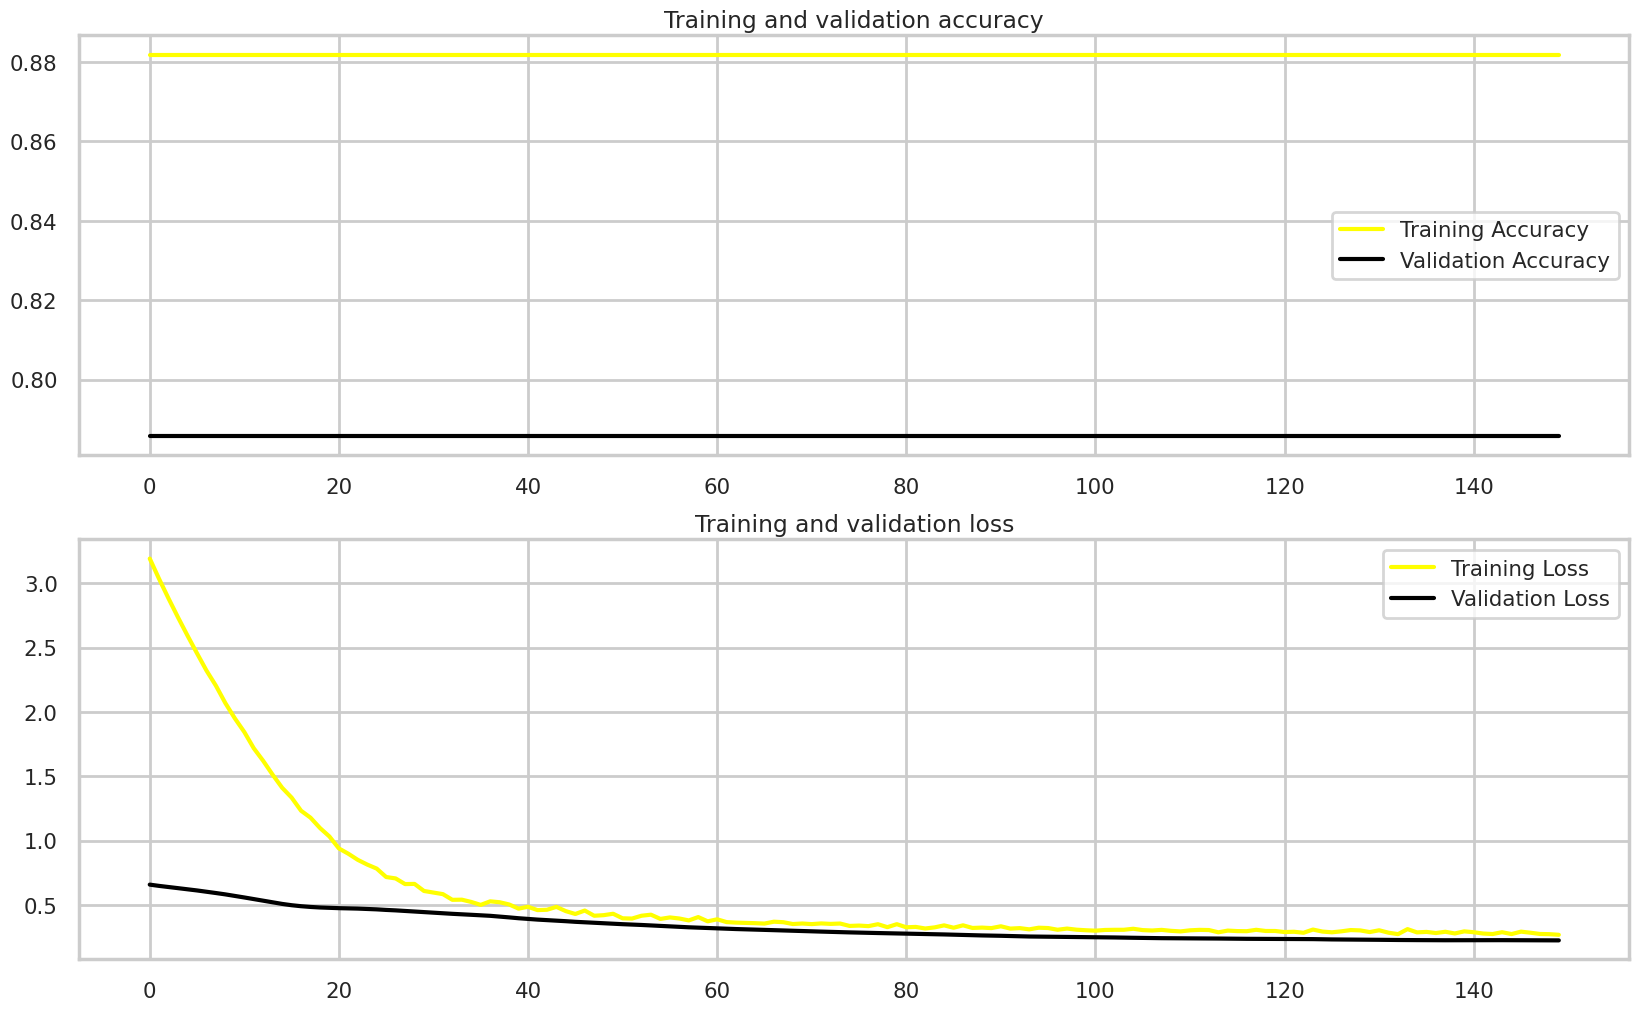

In [49]:

# Convert data to PyTorch datasets and dataloaders
train_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train.to_numpy()))
test_dataset = torch.utils.data.TensorDataset(torch.FloatTensor(x_test), torch.FloatTensor(y_test.to_numpy()))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

# Initialize model, criterion, and optimizer
model = NeuralNetwork(x_train.shape[-1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
acc, val_acc, loss, val_loss = train_model(model, train_loader, test_loader, criterion, optimizer)

# Plot results
plt.figure(figsize=(20, 12))
epochs = range(len(acc))

plt.subplot(2,1,1)
plt.plot(epochs, acc, "yellow", label="Training Accuracy")
plt.plot(epochs, val_acc, "black", label="Validation Accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(epochs, loss, "yellow", label="Training Loss")
plt.plot(epochs, val_loss, "black", label="Validation Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
